# Logistic Regression

In this notebook I'm gonna focus on building Logistic Regresion model with pipeline and searchgrid to predict target from iris_dataset

In [1]:
import numpy as np
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split, LeaveOneOut, RepeatedKFold
from sklearn.metrics import confusion_matrix, f1_score

## Loading and spliting the data

In [18]:
iris_dataset = load_iris()

X = iris_dataset.data
y = iris_dataset.target

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=6)

## Creating pipeline for our model

In [20]:
# pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('log_reg', LogisticRegression())
])

## Finding best parameters for our model

In [21]:
# K-Folds cross-validator
kf = KFold(5, shuffle=True, random_state=1)

# parameters of our model
parameters = {"pca__n_components": list(range(1, X.shape[1]+1, 1)),
              "log_reg__C": np.logspace(-3,3,7),
              "log_reg__penalty": ["l2"]}

grid_search = GridSearchCV(pipe, parameters, cv=kf)

grid_search.fit(X, y);

In [22]:
# best parameters for our model
grid_search.best_params_

{'log_reg__C': 10.0, 'log_reg__penalty': 'l2', 'pca__n_components': 3}

In [23]:
# best score reached
grid_search.best_score_

0.9733333333333334

## Testing our model

In [24]:
best_pipeline = grid_search.best_estimator_

In [25]:
# fitting the model
best_pipeline.fit(X_train, y_train);

In [26]:
# Testing on training data
best_pipeline.score(X_train, y_train)

0.975

In [27]:
# Testing on testing data
best_pipeline.score(X_test, y_test)

1.0

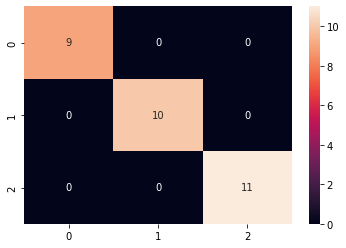

In [28]:
y_pred = best_pipeline.predict(X_test)

# confiusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d");

In [15]:
# checking f1 score of our model
score = f1_score(y_test, y_pred, average='weighted') # [None, 'micro', 'macro', 'weighted']

print(f"overall score on testing data = {score}")

overall score on testing data = 1.0


For diffrent random states of the train_test_split the model's accuracy differs between 90% and 100%, so it it not correct way of testing our model

## Correct accuracy measurements of our model

In [38]:
# 99% of data into training and 1 data point into testing iteratively
loo_result = cross_val_score(pipe, X, y, cv=LeaveOneOut())
loo_result.mean()

0.9533333333333334

In [44]:
# KFolds repeated n times
rkf_result = cross_val_score(pipe, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=4))
rkf_result.mean()

0.9553333333333334